In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
df = yf.download("TLKM.JK", start='2015-12-22', end='2020-12-22')

[*********************100%***********************]  1 of 1 completed


In [35]:
print(df.info)

<bound method DataFrame.info of               Open    High     Low   Close    Adj Close     Volume
Date                                                              
2015-12-22  3100.0  3135.0  3100.0  3135.0  2916.623779   68929200
2015-12-23  3075.0  3145.0  3020.0  3110.0  2893.365234   92014400
2015-12-28  3090.0  3170.0  3090.0  3120.0  2902.668701   47634200
2015-12-29  3100.0  3120.0  3075.0  3095.0  2879.410156   38486500
2015-12-30  3100.0  3135.0  3100.0  3105.0  2888.713623   40956100
...            ...     ...     ...     ...          ...        ...
2020-12-15  3320.0  3490.0  3290.0  3450.0  3450.000000  410175700
2020-12-16  3500.0  3640.0  3500.0  3610.0  3610.000000  455088400
2020-12-17  3610.0  3620.0  3520.0  3540.0  3540.000000  249797800
2020-12-18  3500.0  3540.0  3500.0  3510.0  3510.000000  187856600
2020-12-21  3530.0  3610.0  3510.0  3520.0  3520.000000  267970200

[1262 rows x 6 columns]>


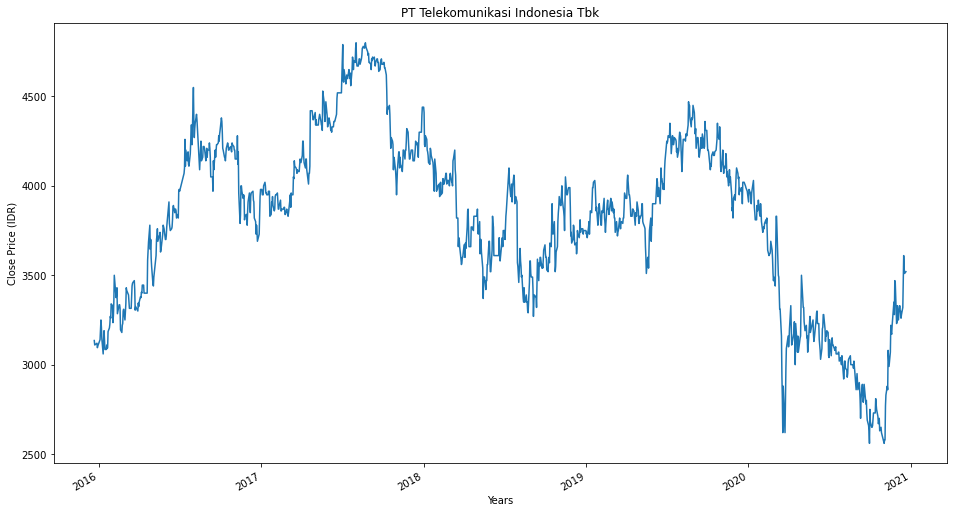

In [36]:
df['Close'].plot(figsize=(16,9))
plt.title('PT Telekomunikasi Indonesia Tbk')
plt.xlabel('Years')
plt.ylabel('Close Price (IDR)')
plt.show()

In [37]:
df = df[['Close']]
df.head()

,Close
Date,
2015-12-22,3135.0
2015-12-23,3110.0
2015-12-28,3120.0
2015-12-29,3095.0
2015-12-30,3105.0


In [38]:
#Membuat variabel future_days
future_days = 5

# Membuat column 'prediction'
df['Prediction'] = df[['Close']].shift(-future_days)

<ipython-input-38-796799f509a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


- Di atas maksudnya adalah mengubah data yang 25 hari selanjutnya jadi hari itu juga
- misalnya data tanggal 1, predictionnya diambil dari data tanggal 26 gitu

In [39]:
df.head(10)

,Close,Prediction
Date,,
2015-12-22,3135.0,3140.0
2015-12-23,3110.0,3195.0
2015-12-28,3120.0,3250.0
2015-12-29,3095.0,3210.0
2015-12-30,3105.0,3145.0
2016-01-04,3140.0,3060.0
2016-01-05,3195.0,3145.0
2016-01-06,3250.0,3190.0
2016-01-07,3210.0,3135.0


In [40]:
# Membuat feature dataset (X) lalu diubah ke numpy array dan menghapus 'n' hari
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[3135.]
 [3110.]
 [3120.]
 ...
 [3260.]
 [3280.]
 [3320.]]


In [41]:
# Membuat target dataset (y) lalu diubah ke numpy array dan mengambil data target kecuali 'x' hari yang terakhir
y = np.array(df['Prediction'])[:-future_days]
print(y)

[3140. 3195. 3250. ... 3540. 3510. 3520.]


#### Splitting data 75% Train & 25% Testing

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#### Membuat model

In [43]:
#Decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [44]:
#Mengambil 'x' rows terakhir dari feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days] # Mengambil column 'close' saja
x_future = x_future.tail(future_days)                # Mengambil data paling belakang sejumlah 'future_days' (25)
x_future = np.array(x_future)                        # Mengubahnya jadi tipe data array
x_future

array([[3300.],
       [3300.],
       [3260.],
       [3280.],
       [3320.]])

In [45]:
# Menampilkan prediksi tree regression model
tree_prediction = tree.predict(x_future)
print('---- Hasil prediksi menggunakan tree regression')
print(tree_prediction)
print()

# Menampilkan prediksi Linear regression model
print('---- Hasil prediksi menggunakan Linear regression')
lr_prediction = lr.predict(x_future)
print(lr_prediction)

---- Hasil prediksi menggunakan tree regression
[3409.16666667 3409.16666667 3445.         3420.         3406.66666667]

---- Hasil prediksi menggunakan Linear regression
[3322.13194532 3322.13194532 3283.69507891 3302.91351211 3341.35037852]


### Visualisasi Data

#### Decision Tree Prediction Visualization

<ipython-input-46-79bd4c843884>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


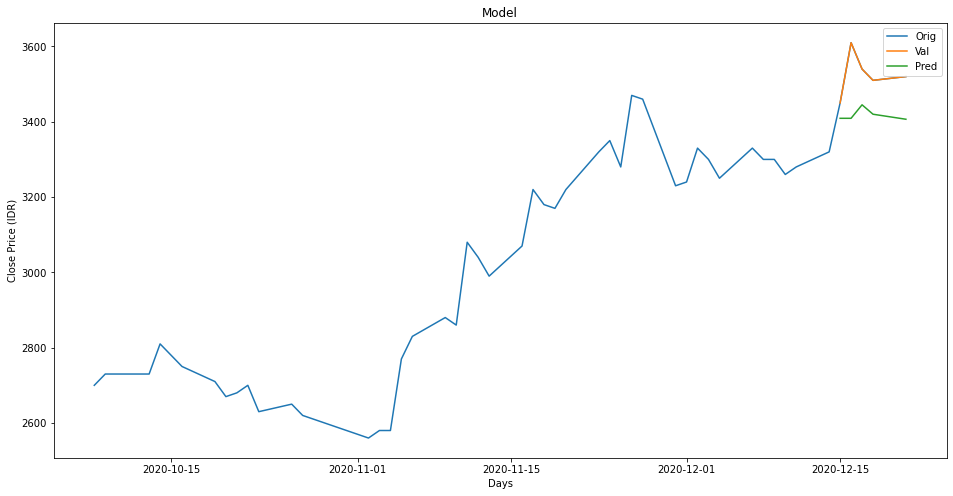

In [46]:
predictions = tree_prediction

valid = df[X.shape[0]:] #all the rest of the data
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price (IDR)')
plt.plot(df['Close'].tail(50))
plt.plot(valid[['Close', 'Predictions']].tail(50))
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [47]:
valid

,Close,Prediction,Predictions
Date,,,
2020-12-15,3450.0,NaN,3409.166667
2020-12-16,3610.0,NaN,3409.166667
2020-12-17,3540.0,NaN,3445.000000
2020-12-18,3510.0,NaN,3420.000000
2020-12-21,3520.0,NaN,3406.666667


#### Linear Regression Prediction Visualization

<ipython-input-48-96c2fab762ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


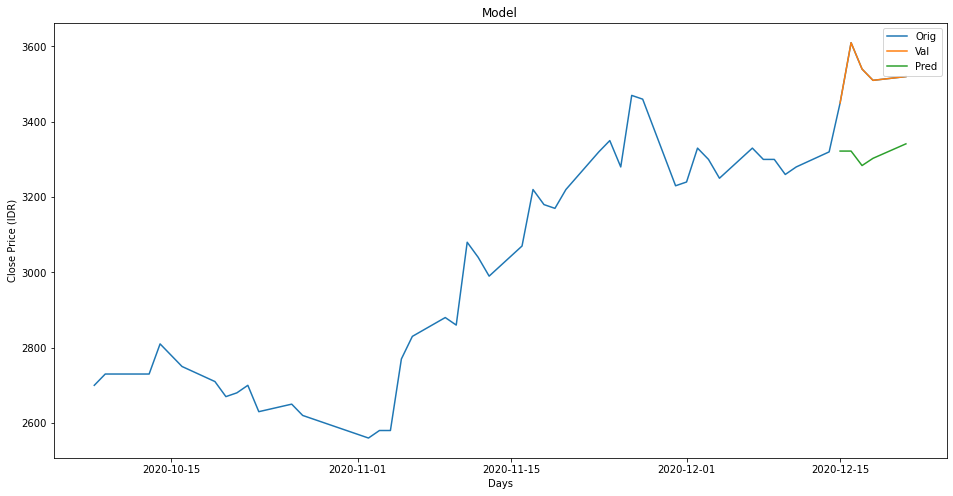

In [48]:
predictions = lr_prediction

valid = df[X.shape[0]:] #all the rest of the data
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price (IDR)')
plt.plot(df['Close'].tail(50))
plt.plot(valid[['Close', 'Predictions']].tail(50))
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()